<a href="https://colab.research.google.com/github/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Item_based_Collaborative_Recommender_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

## Loading MovieLens dataset

In [2]:
df_tags = pd.read_csv("../data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [3]:
len(df_tags), max(df_tags['movieId']),min(df_tags['movieId']), max(df_tags['userId']), min(df_tags['userId'])

(465564, 131258, 1, 138472, 18)

In [4]:
df_ratings = pd.read_csv("../data/ratings_small.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
len(df_ratings), max(df_ratings['rating']),min(df_ratings['rating']), max(df_ratings['userId']), min(df_ratings['userId'])

(144999, 5.0, 0.5, 971, 1)

In [6]:
df_movies = pd.read_csv("../data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
len(df_movies)

27278

## Merging required datasets

In [8]:
merged_df = pd.merge(df_ratings, df_movies, how='inner', on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [9]:
len(merged_df)

144999

## Exploratory data analysis

Example of a multiple rating scenario by a specific movie:

In [10]:
merged_df[(merged_df['title'] == 'Chasing Amy (1997)') ]

,userId,movieId,rating,timestamp,title,genres
81672,21,1639,3.0,992190290,Chasing Amy (1997),Comedy|Drama|Romance
81673,23,1639,3.0,914457720,Chasing Amy (1997),Comedy|Drama|Romance
81674,24,1639,5.0,994230323,Chasing Amy (1997),Comedy|Drama|Romance
81675,33,1639,5.0,966285369,Chasing Amy (1997),Comedy|Drama|Romance
81676,40,1639,1.0,941626558,Chasing Amy (1997),Comedy|Drama|Romance
...,...,...,...,...,...,...
81764,936,1639,3.0,938816856,Chasing Amy (1997),Comedy|Drama|Romance
81765,940,1639,3.5,1113523195,Chasing Amy (1997),Comedy|Drama|Romance
81766,947,1639,4.0,953428619,Chasing Amy (1997),Comedy|Drama|Romance
81767,955,1639,4.0,953664514,Chasing Amy (1997),Comedy|Drama|Romance


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144999 entries, 0 to 144998
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     144999 non-null  int64  
 1   movieId    144999 non-null  int64  
 2   rating     144999 non-null  float64
 3   timestamp  144999 non-null  int64  
 4   title      144999 non-null  object 
 5   genres     144999 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 7.7+ MB


In [12]:
my_report = sv.analyze(merged_df)
#my_report.show_html('../reports/EDA_complete_report_sweet_viz.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

In [12]:
refined_dataset = merged_df.groupby(by=['userId','title','movieId'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0


In [13]:
refined_dataset[(refined_dataset['title'] == 'Chasing Amy (1997)') ]

,userId,title,movieId,rating
2163,21,Chasing Amy (1997),1639,3.0
2449,23,Chasing Amy (1997),1639,3.0
2625,24,Chasing Amy (1997),1639,5.0
3865,33,Chasing Amy (1997),1639,5.0
4342,40,Chasing Amy (1997),1639,1.0
...,...,...,...,...
139321,936,Chasing Amy (1997),1639,3.0
139680,940,Chasing Amy (1997),1639,3.5
140548,947,Chasing Amy (1997),1639,4.0
141781,955,Chasing Amy (1997),1639,4.0


In [14]:
refined_dataset.head(20)

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0
5,1,Aliens (1986),1200,4.0
6,1,"American Werewolf in London, An (1981)",1321,4.0
7,1,Apocalypse Now (1979),1208,3.5
8,1,Army of Darkness (1993),1215,4.0
9,1,Austin Powers: The Spy Who Shagged Me (1999),2683,3.5


In [15]:
refined_dataset.to_csv('../data/refined_dataset.csv', encoding='utf-8')

In [16]:
refined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144999 entries, 0 to 144998
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   144999 non-null  int64  
 1   title    144999 non-null  object 
 2   movieId  144999 non-null  int64  
 3   rating   144999 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ MB


In [17]:
num_users = len(refined_dataset['userId'].value_counts())
print(num_users)
num_items = len(refined_dataset['title'].value_counts())
print(num_items)

971
9648


In [18]:
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 971
Unique number of movies in the dataset: 9648


In [19]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,2743
1.0,5725
1.5,2106
2.0,10983
2.5,5914
3.0,31725
3.5,14643
4.0,39396
4.5,11118


In [31]:
rating_count_df['count'].iloc[9]

20646

In [29]:
rating_count_df['rating'].iloc[0]

KeyError: 'rating'

In [21]:
sum_column_rating_count_df = rating_count_df.sum(axis=0)
sum_column_rating_count_df

count    144999
dtype: int64

Text(0, 0.5, 'number of ratings')

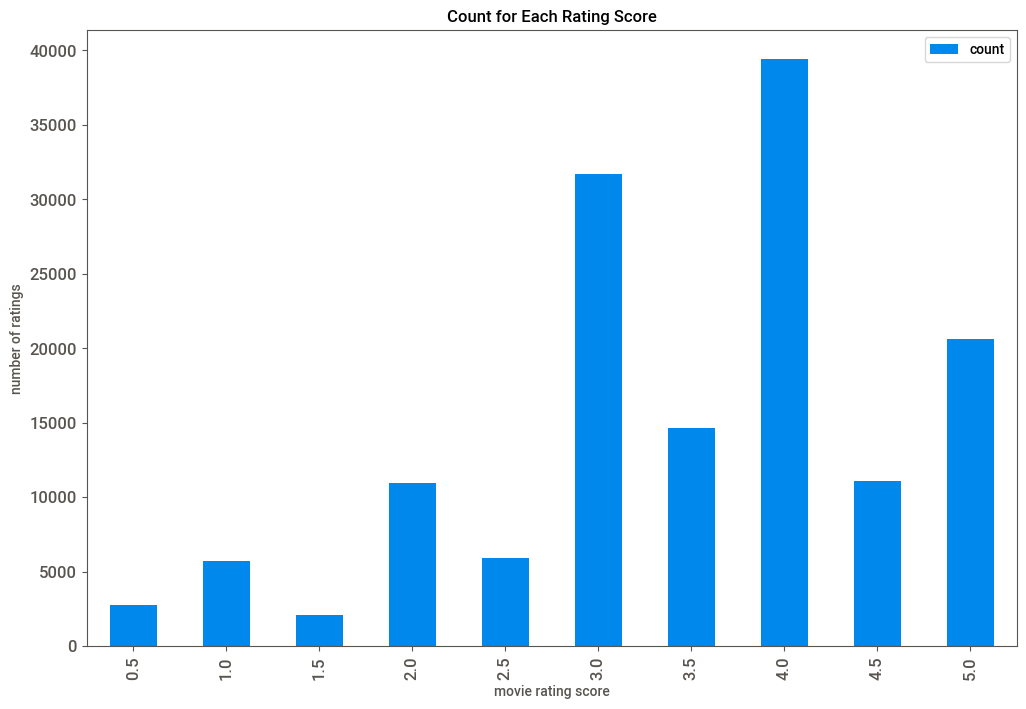

In [22]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")